# Análise de Embeddings e Redução da Dimensionalidade

**Objetivo.** Dado um conjunto de textos, gerar embeddings com BERT e investigar a estrutura dos dados via PCA, t-SNE e UMAP. Em seguida, identificar clusters e relacioná-los a categorias semânticas.

In [ ]:
sentences = [
    'I swap butter for olive oil in many recipes.',
    'Canberra is the capital of Australia.',
    'Ottawa is the capital city of Canada.',
    'Paris is the most populated city in France.',
    'Tokyo is among the most populous metropolitan areas worldwide.',
    'I prefer my coffee with no sugar and a splash of milk.',
    'The recipe for pasta carbonara is simple.',
    'A pinch of salt enhances sweetness in desserts.',
    'Alignment techniques reduce harmful outputs.',
    'Explainable AI highlights salient features for decisions.',
    'Transformer models enable long-range language dependencies.',
    'Black swan events stress-test portfolio resilience.',
    'The Sahara Desert spans much of North Africa.',
    'Inflation erodes real purchasing power of cash.',
    'Aromatics like garlic and onion build flavor early.',
    'Value stocks trade at lower multiples relative to fundamentals.',
    'Quantization reduces memory with minimal accuracy loss.',
    'Tax-loss harvesting offsets capital gains.',
    'Investing in technology can be risky.',
    'Fermented foods add acidity and complexity.',
    'Marinating tofu improves texture and taste.',
    'Vector databases power semantic search at scale.',
    'Distillation transfers knowledge from large to small models.',
    'The Great Barrier Reef lies off Australia’s northeast coast.',
    'Retrieval-augmented generation grounds answers in sources.',
    'Iceland lies on the Mid-Atlantic Ridge.',
    'The Baltic states border the eastern Baltic Sea.',
    'Multimodal learning aligns text with images and audio.',
    'Risk tolerance should guide position sizing.',
    'Time in the market beats timing the market.',
    'Behavioral biases can derail investment plans.',
    'Reinforcement learning fine-tunes policies from human feedback.',
    'Edge AI runs models under strict latency constraints.',
    'Deglazing lifts browned bits to make pan sauces.',
    'Tempering chocolate stabilizes cocoa butter crystals.',
    'What is the capital of France?',
    'Johannesburg is a major city but not South Africa’s capital.',
    'The Danube passes through multiple European capitals.',
    'The Amazon River carries one of the largest water volumes on Earth.',
    'A healthy emergency fund reduces forced selling.',
    'I batch-cook grains for quick lunches.',
    'Resting steak helps redistribute the juices.',
    'The Atacama is one of the driest deserts on the planet.',
    'Liquidity risk rises when trading volumes are thin.',
    'Mount Everest is the highest peak above sea level.',
    'Graph neural networks capture relational structure.',
    'Sourdough starter needs regular feedings to stay active.',
    'The stock market experienced a drop today.',
    'Umami-rich ingredients deepen savory dishes.',
    'Al dente pasta retains a slight bite after cooking.',
    'Rebalancing restores target asset allocation.',
    'Continual learning mitigates catastrophic forgetting.',
    'Bond duration measures sensitivity to interest-rate changes.',
    'Diffusion models synthesize high-fidelity images.',
    'Expense ratios compound against long-term returns.',
    'Self-supervised pretraining reduces labeled data needs.',
    'What country contains the city of Kyoto?',
    'Stir-frying requires high heat and constant movement.',
    'Covered calls generate income with capped upside.',
    'The Nile flows northward into the Mediterranean Sea.',
    'Causal inference distinguishes correlation from effect.',
    'Prompt engineering steers generative behavior reliably.',
    'Few-shot prompting improves generalization on new tasks.',
    'Growth investing prioritizes earnings expansion.',
    'The Alps stretch across several central European countries.',
    'The Andes form a continuous mountain range along South America.',
    'I cook vegetarian meals on weekdays to simplify planning.',
    'Natural language processing has advanced greatly.',
    'Sous-vide delivers precise temperature control.',
    'Diversification reduces idiosyncratic risk across holdings.',
    'Sharpe ratio evaluates risk-adjusted performance.',
    'Artificial intelligence is transforming the world.',
    'Credit spreads widen during economic uncertainty.',
    'Emerging markets add diversification but higher volatility.',
    'Mise en place speeds up weeknight cooking.',
    'The Caspian Sea is a landlocked body of water.',
    'Evaluation with benchmarks must avoid data leakage.',
    'Cairo sits along the Nile River delta.',
    'Federated learning trains models without centralizing data.',
    'Lagos is Nigeria’s largest city by population.',
    'Dollar-cost averaging smooths entry price over time.',
    'LoRA adapters enable efficient fine-tuning.',
    'I keep a jar of homemade pesto for pasta.',
    'New Delhi serves as the seat of India’s government.',
    'I like to cook Italian dishes on Sundays.',
    'Roasting vegetables caramelizes natural sugars.',
    'ETFs provide broad market exposure with intraday liquidity.',
    'Proofing time affects a bread’s crumb structure.'
]

## Predição dos Embeddings

Utilize o modelo BERT pré-treinado para gerar embeddings de todos os textos fornecidos.  
O objetivo é obter uma matriz `X` com formato **(N, dim)**, onde **N** é o número de textos e **dim** é a dimensionalidade dos vetores de embedding.

In [ ]:
pip install -U sentence-transformers

In [ ]:



from sentence_transformers import SentenceTransformer
import numpy as np



model = SentenceTransformer('all-MiniLM-L6-v2')  # rápido e de boa qualidade
X_bert = model.encode(sentences, batch_size=32, show_progress_bar=True, convert_to_numpy=True)
print("X_bert shape:", X_bert.shape)  # (88, dim) dim depende do modelo (384 para all-MiniLM-L6-v2)
np.save('embeddings_bert.npy', X_bert)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

X_bert shape: (88, 384)


## PCA

Aplique **PCA (Principal Component Analysis)** para projetar os embeddings em duas dimensões e visualizar a estrutura global dos dados.  
O PCA ajuda a capturar as direções de maior variância e pode indicar agrupamentos lineares.

**Tarefas:**
- Reduza a dimensionalidade dos embeddings para 2 componentes principais.  
- Plote os pontos resultantes com `matplotlib`, identificando possíveis agrupamentos.  
- Analise qualitativamente se há separação entre textos de temas distintos.

Formato da matriz X: (88, 384)

Componentes principais (primeiros 5 rows):
[[-0.24090259 -0.28698763]
 [-0.13978763  0.35037437]
 [-0.15896411  0.3370413 ]
 [-0.24661812  0.36807108]
 [-0.0865492   0.41155735]]

Variância explicada por PC1 e PC2:
[0.07404028 0.06720166]


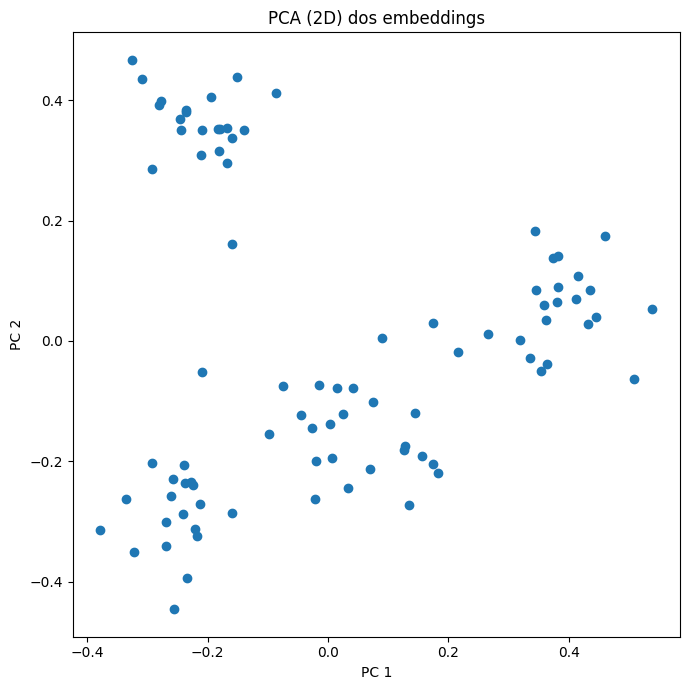

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Carregar embeddings
X = np.load('/content/embeddings_bert.npy')
print("Formato da matriz X:", X.shape)

# PCA para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("\nComponentes principais (primeiros 5 rows):")
print(X_pca[:5])

print("\nVariância explicada por PC1 e PC2:")
print(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(7, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA (2D) dos embeddings")
plt.tight_layout()
plt.show()


## t-SNE

Use **t-SNE (t-distributed Stochastic Neighbor Embedding)** para investigar a estrutura local dos dados.  
Diferente do PCA, o t-SNE tenta preservar vizinhanças locais e pode revelar grupos mais sutis.

**Tarefas:**
- Reduza os embeddings para 2D usando `TSNE` do `scikit-learn`.  
- Ajuste parâmetros como `perplexity` e `learning_rate` para comparar resultados.  
- Visualize o mapa e observe se os textos semelhantes ficam próximos.

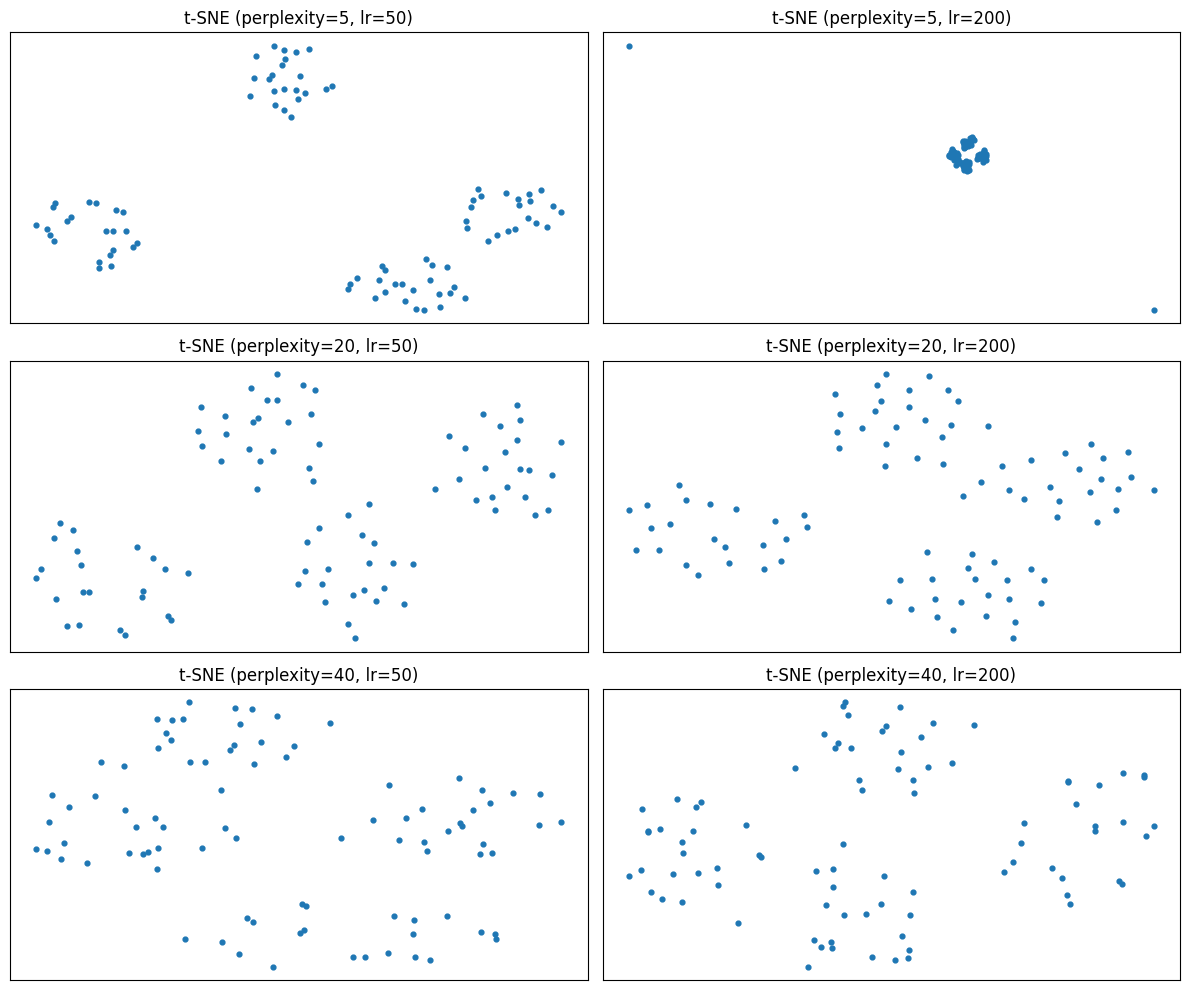

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Carregar embeddings (ajuste o caminho se necessário)
X = np.load("/content/embeddings_bert.npy")

# Configurações para testar
perplexities = [5, 20, 40]
learning_rates = [50, 200]

fig, axes = plt.subplots(len(perplexities), len(learning_rates), figsize=(12, 10))

for i, perp in enumerate(perplexities):
    for j, lr in enumerate(learning_rates):
        tsne = TSNE(
            n_components=2,
            perplexity=perp,
            learning_rate=lr,
            init="random",
            random_state=42
        )

        X_tsne = tsne.fit_transform(X)

        ax = axes[i, j]
        ax.scatter(X_tsne[:, 0], X_tsne[:, 1], s=12)
        ax.set_title(f"t-SNE (perplexity={perp}, lr={lr})")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()


<h1>Análise dos resultados do t-SNE</h1>

1) Perplexity = 20, learning_rate = 50
Você obteve quatro grupos bem definidos.
Dentro de cada grupo os pontos ficam um pouco mais separados, mas a distância entre grupos é clara.
→ Bom balanceamento entre estrutura local e global.

2) Perplexity = 5, learning_rate = 200
O resultado colapsou em um grupo central, com apenas dois pontos isolados nas extremidades.
→ Perplexity muito baixa faz o t-SNE exagerar na proximidade local, “puxando” tudo para o centro.
→ Esse resultado não preserva bem a estrutura real.

3) Perplexity = 20, learning_rate = 200
Resultado semelhante ao de learning_rate 50: quatro grupos bem definidos.
→ O t-SNE manteve estabilidade com esse valor de perplexity.
→ A diferença no learning_rate não distorceu a estrutura geral.

4) Perplexity = 40, learning_rate = 50
Os grupos ficaram mais bagunçados, com fronteiras menos claras.
→ Perplexity alta demais amplia demais a vizinhança e tende a misturar clusters.
→ Perde-se definição.

5) Perplexity = 40, learning_rate = 200
Ainda existe indicação dos quatro grupos, mas o mapa fica mais disperso e menos limpo.
→ Dá para ver a estrutura geral, mas não tão bem quanto perplexity 20.

<h1>Conclusão </h1>

Perplexity = 20 foi onde o t-SNE funcionou melhor:
→ Quatro grupos nítidos, separados e interpretáveis.

Perplexity muito baixa (5) colapsa os clusters.

Perplexity muito alta (40) mistura os grupos e reduz separabilidade.

O learning_rate alterou densidade e espalhamento, mas não mudou radicalmente a estrutura quando a perplexity estava bem ajustada.

## UMAP

Aplique **UMAP (Uniform Manifold Approximation and Projection)** como alternativa ao t-SNE.  
O UMAP é mais eficiente, preserva parte da estrutura global e é útil para visualização e pré-processamento.

**Tarefas:**
- Gere uma projeção 2D dos embeddings com `umap.UMAP`.  
- Experimente variar `n_neighbors` e `min_dist` para observar mudanças na distribuição dos clusters.  
- Compare visualmente com os resultados do PCA e t-SNE.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


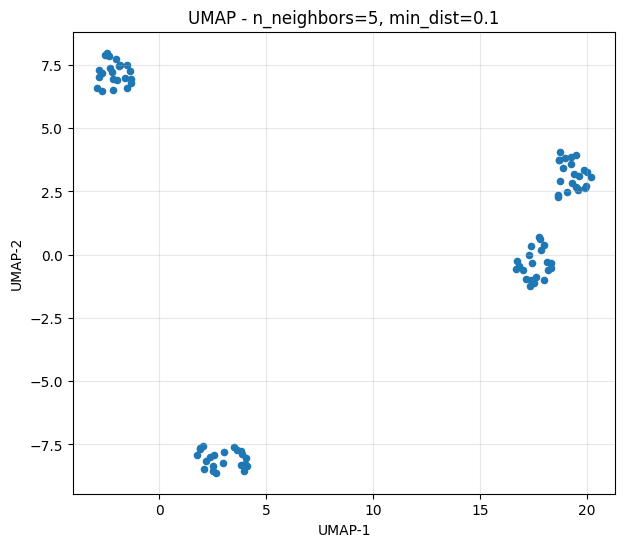

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


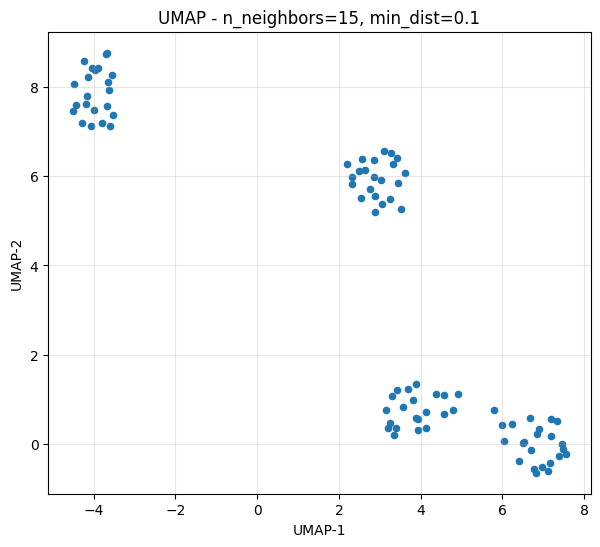

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


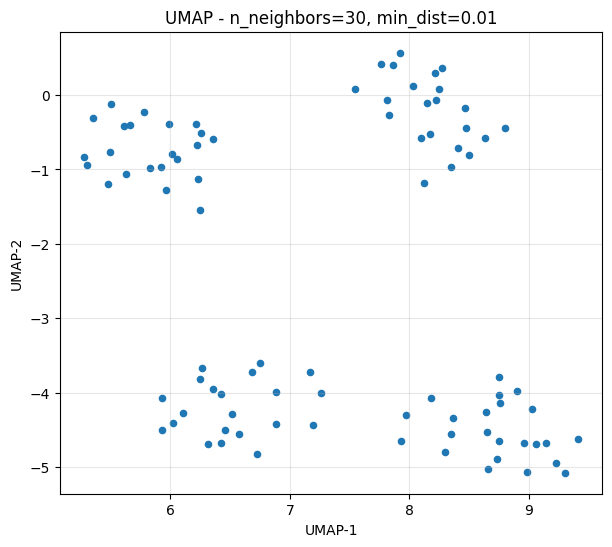

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


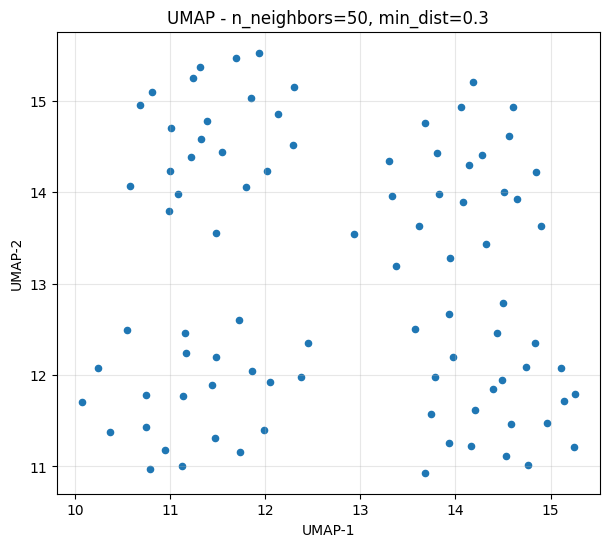

In [10]:
import numpy as np
import umap
import matplotlib.pyplot as plt

X = np.load('/content/embeddings_bert.npy')

def plot_umap(X, n_neighbors, min_dist):
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        random_state=42
    )

    X_umap = reducer.fit_transform(X)

    plt.figure(figsize=(7, 6))
    plt.scatter(X_umap[:, 0], X_umap[:, 1], s=20)
    plt.title(f"UMAP - n_neighbors={n_neighbors}, min_dist={min_dist}")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.grid(True, alpha=0.3)
    plt.show()

    return X_umap

umap_1 = plot_umap(X, n_neighbors=5, min_dist=0.1)
umap_2 = plot_umap(X, n_neighbors=15, min_dist=0.1)
umap_3 = plot_umap(X, n_neighbors=30, min_dist=0.01)
umap_4 = plot_umap(X, n_neighbors=50, min_dist=0.3)


### **Análise dos resultados do UMAP**

#### **1) n_neighbors=5, min_dist=0.1 (umap_1)**

A projeção mostra **4 clusters bem definidos**, com **alta compactação interna**.
A separação entre os grupos é clara, o que indica que o UMAP está capturando bem tanto a estrutura local quanto parte da global.
Com poucos vizinhos, o modelo privilegia relações locais, e isso favorece a formação de grupos pequenos e bem separados.

---

#### **2) n_neighbors=15, min_dist=0.1 (umap_2)**

Ainda há **4 grupos bem definidos**, mas a compactação interna é menor que no caso anterior.
A separação entre clusters permanece boa, porém com contornos um pouco mais "soltos".
Com mais vizinhos, o UMAP passa a considerar uma vizinhança maior e tende a suavizar os agrupamentos — exatamente o efeito observado.

---

#### **3) n_neighbors=30, min_dist=0.01 (umap_3)**

Os **4 grupos ainda existem**, mas ficam **menos bem definidos** devido à baixa compactação (min_dist muito baixo tende a juntar pontos demais).
Apesar disso, a estrutura geral ainda preserva a ideia de quatro regiões distintas.
Esse resultado mostra perda de nitidez na separação mas manutenção da macroestrutura.

---

#### **4) n_neighbors=50, min_dist=0.3 (umap_4)**

A estrutura muda:

* **2 grupos permanecem bem separados**,
* Outros **2 começam a se misturar**, com bordas sobrepostas.

A compactação é pior e a separação diminui, o que faz sentido:
muitos vizinhos tornam a modelagem mais global, e `min_dist` alto afasta pontos, dificultando a formação de clusters nítidos.

---

### **Conclusão geral**

O UMAP mostra uma tendência clara:

* **Valores menores de n_neighbors e min_dist produzem clusters mais compactos e bem separados.**
* **Valores maiores tendem a suavizar, expandir ou fundir grupos.**





## Classificação

Com base nas categorias observadas nos gráficos anteriores, crie uma função simples que receba um texto e classifique-o na categoria mais provável.

**Tarefas:**
- Use os embeddings existentes e os clusters identificados para rotular automaticamente cada texto.  
- Crie uma função `classificar_texto(texto: str)` que:
  1. Gere o embedding do texto.
  2. Calcule a distância para os clusters identificados.
  3. Retorne o nome do cluster mais próximo.

In [14]:
print("X shape:", X.shape)                       # sua matriz original de embeddings (ex: (88, 384))

with torch.no_grad():
    sample = tokenizer("exemplo", return_tensors="pt")
    out = model(**sample)
    print("model embedding dim:", out.last_hidden_state[:,0,:].shape[1])


X shape: (88, 384)
model embedding dim: 768


In [17]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_distances
from collections import Counter

sbert = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Embeddings X já existem (384d)
X = np.load('/content/embeddings_bert.npy')

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

def nomear_cluster_textos(textos):
    palavras = []
    for t in textos:
        for p in t.lower().split():
            if p.isalpha() and len(p) > 3:
                palavras.append(p)
    mais_comuns = [p for p, _ in Counter(palavras).most_common(3)]
    return " ".join(mais_comuns) if mais_comuns else "cluster"

clusters_textos = {i: [] for i in range(4)}
for texto, lab in zip(sentences, labels):
    clusters_textos[lab].append(texto)

nomes_clusters = {}
for cid in clusters_textos:
    nomes_clusters[cid] = nomear_cluster_textos(clusters_textos[cid])

def classificar_texto(texto, modelo_sbert, kmeans_model, nomes_clusters):
    emb = modelo_sbert.encode(texto, convert_to_numpy=True).reshape(1, -1)
    dists = cosine_distances(emb, kmeans_model.cluster_centers_)[0]
    idx = dists.argmin()
    return nomes_clusters[idx]

texto = "Um texto qualquer para testar."
classe = classificar_texto(texto, sbert, kmeans, nomes_clusters)
print("Classe:", classificar_texto(texto, sbert, kmeans, nomes_clusters))
print("Clusters:", nomes_clusters)




Classe: butter pasta like
Clusters: {0: 'butter pasta like', 1: 'city capital most', 2: 'risk market investing', 3: 'models learning with'}
